In [1]:
import numpy as np
import camb
from matplotlib import pyplot as plt
from scipy import interpolate

%matplotlib inline

In [2]:
#set up a new set of parameters for CAMB
pars = camb.read_ini("Planck15.ini")
pars.WantTransfer = True

print(pars.ombh2,pars.omch2)

redshift = np.linspace(0,6,121)[::-1]
# redshift = [100]
pars.set_matter_power(redshifts=redshift,kmax=300)

pars.Accuracy.AccuracyBoost = 2.

# print(pars)

results = camb.get_results(pars)
redshift

0.0223 0.1188


array([6.  , 5.95, 5.9 , 5.85, 5.8 , 5.75, 5.7 , 5.65, 5.6 , 5.55, 5.5 ,
       5.45, 5.4 , 5.35, 5.3 , 5.25, 5.2 , 5.15, 5.1 , 5.05, 5.  , 4.95,
       4.9 , 4.85, 4.8 , 4.75, 4.7 , 4.65, 4.6 , 4.55, 4.5 , 4.45, 4.4 ,
       4.35, 4.3 , 4.25, 4.2 , 4.15, 4.1 , 4.05, 4.  , 3.95, 3.9 , 3.85,
       3.8 , 3.75, 3.7 , 3.65, 3.6 , 3.55, 3.5 , 3.45, 3.4 , 3.35, 3.3 ,
       3.25, 3.2 , 3.15, 3.1 , 3.05, 3.  , 2.95, 2.9 , 2.85, 2.8 , 2.75,
       2.7 , 2.65, 2.6 , 2.55, 2.5 , 2.45, 2.4 , 2.35, 2.3 , 2.25, 2.2 ,
       2.15, 2.1 , 2.05, 2.  , 1.95, 1.9 , 1.85, 1.8 , 1.75, 1.7 , 1.65,
       1.6 , 1.55, 1.5 , 1.45, 1.4 , 1.35, 1.3 , 1.25, 1.2 , 1.15, 1.1 ,
       1.05, 1.  , 0.95, 0.9 , 0.85, 0.8 , 0.75, 0.7 , 0.65, 0.6 , 0.55,
       0.5 , 0.45, 0.4 , 0.35, 0.3 , 0.25, 0.2 , 0.15, 0.1 , 0.05, 0.  ])

In [3]:
#set up the primordial power spectrum
h = pars.h
As = pars.InitPower.As
A = 2*np.pi*np.pi*As
ns = pars.InitPower.ns
kpivot = pars.InitPower.pivot_scalar
pfactor = A*kpivot**(1.-ns)

def P(k):
    return np.power(k,ns-4.)*pfactor

In [4]:
As,np.log(1e10*As), ns

(2.1413038238853928e-09, 3.064, 0.9667)

In [5]:
pars.omegam, pars.omegab, pars.omegac, pars.h

(0.30749398806757705, 0.048597561544344206, 0.2588964265232328, 0.6774)

In [6]:
redshift[::-1], results.get_sigma8()[::-1]

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
        1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
        1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
        2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 ,
        2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15, 3.2 , 3.25,
        3.3 , 3.35, 3.4 , 3.45, 3.5 , 3.55, 3.6 , 3.65, 3.7 , 3.75, 3.8 ,
        3.85, 3.9 , 3.95, 4.  , 4.05, 4.1 , 4.15, 4.2 , 4.25, 4.3 , 4.35,
        4.4 , 4.45, 4.5 , 4.55, 4.6 , 4.65, 4.7 , 4.75, 4.8 , 4.85, 4.9 ,
        4.95, 5.  , 5.05, 5.1 , 5.15, 5.2 , 5.25, 5.3 , 5.35, 5.4 , 5.45,
        5.5 , 5.55, 5.6 , 5.65, 5.7 , 5.75, 5.8 , 5.85, 5.9 , 5.95, 6.  ]),
 array([0.8277595 , 0.80643783, 0.7855532 , 0.76515659, 0.74528769,
        0.72597608, 0.70724235, 0.68909922, 0.67155266, 0.65460295,
        0.63824564, 0.62247239, 0.60727182, 0.59

In [7]:
f_growth = (results.get_fsigma8() / results.get_sigma8())[::-1]
np.savetxt("fgrowth-0-6.dat",f_growth)
f_growth

array([0.51997231, 0.54979259, 0.57827781, 0.60535959, 0.63099859,
       0.65518097, 0.67791461, 0.6992253 , 0.71915311, 0.73774899,
       0.75507181, 0.77118574, 0.78615803, 0.80005728, 0.81295195,
       0.82490928, 0.83599445, 0.84626995, 0.85579524, 0.8646265 ,
       0.87281641, 0.88041425, 0.88746589, 0.89401386, 0.90009753,
       0.90575325, 0.91101452, 0.91591215, 0.92047451, 0.92472762,
       0.92869539, 0.93239974, 0.9358608 , 0.93909703, 0.94212535,
       0.94496132, 0.94761918, 0.950112  , 0.95245184, 0.9546497 ,
       0.95671575, 0.95865933, 0.96048901, 0.96221272, 0.96383771,
       0.96537073, 0.96681797, 0.96818513, 0.9694775 , 0.97069998,
       0.97185708, 0.97295298, 0.97399154, 0.97497638, 0.97591081,
       0.97679794, 0.97764062, 0.97844153, 0.97920318, 0.97992785,
       0.98061771, 0.98127478, 0.9819009 , 0.98249786, 0.98306726,
       0.98361064, 0.98412943, 0.98462497, 0.98509851, 0.98555122,
       0.98598419, 0.98639847, 0.98679503, 0.98717475, 0.98753

In [8]:
ComD = results.comoving_radial_distance(redshift)[::-1]*h
print(ComD)
np.savetxt("comovingD-0-6.dat",ComD)

[   0.          148.15045134  292.75168058  433.73678844  571.06400667
  704.71503004  834.69297674  961.02011476 1083.73547643 1202.8924633
 1318.55652199 1430.80295032 1539.71487399 1645.38141759 1747.8960803
 1847.35531653 1943.85731426 2037.50095867 2128.3849658  2216.60716907
 2302.26394141 2385.44973582 2466.25672834 2544.7745484  2621.09008327
 2695.28734429 2767.44738467 2837.6482593  2905.96501897 2972.46973204
 3037.23152785 3100.31665712 3161.78856525 3221.70797512 3280.13297675
 3337.11912143 3392.71951854 3446.98493362 3499.96388632 3551.70274757
 3602.24583501 3651.63550618 3699.91224919 3747.11477031 3793.28007855
 3838.44356688 3882.63909015 3925.89903964 3968.25441424 4009.73488838
 4050.36887667 4090.18359543 4129.20512119 4167.45844624 4204.96753133
 4241.75535574 4277.84396471 4313.25451441 4348.0073146  4382.12186902
 4415.61691371 4448.51045325 4480.81979516 4512.56158249 4543.75182466
 4574.40592672 4604.53871708 4634.16447381 4663.29694953 4691.94939507
 4720.13

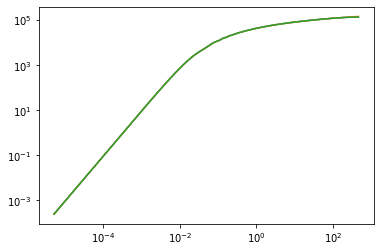

In [9]:
koverh = results.get_matter_transfer_data().transfer_data[0,:,:]
k = koverh * h
cdm = results.get_matter_transfer_data().transfer_data[1,:,::-1]*k*k
bary = results.get_matter_transfer_data().transfer_data[2,:,::-1]*k*k
tot = results.get_matter_transfer_data().transfer_data[6,:,::-1]*k*k
koverh = koverh[:,0]
k = k[:,0]

plt.loglog(koverh,cdm[:,[0]])
plt.loglog(koverh,bary[:,[0]])
plt.loglog(koverh,tot[:,[0]])
plt.show()

In [10]:
koverhlin, zz, pplin = results.get_linear_matter_power_spectrum(var1="delta_tot",var2="delta_tot",k_hunit=True,hubble_units=True,nonlinear=False)

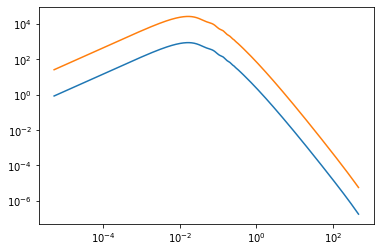

In [11]:
plt.loglog(koverhlin,pplin[-1])
# plt.gca().set_prop_cycle(None)
# plt.loglog(koverh,(P(k) * bary[:,-1]**2))

plt.loglog(koverhlin,pplin[0])
# plt.gca().set_prop_cycle(None)
# plt.loglog(koverh,(P(k) * bary[:,0]**2))
plt.show()

In [12]:
TransDat = np.concatenate((koverh[:,np.newaxis],tot),axis=1)

In [13]:
np.savetxt("LinearTransfer2015.dat",TransDat)

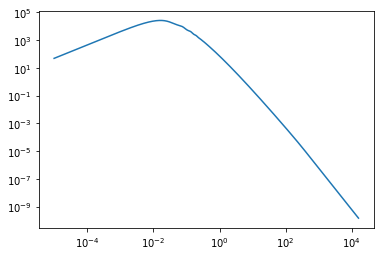

In [15]:
PK = results.get_matter_power_interpolator(nonlinear=False, var1="delta_tot", var2="delta_tot", hubble_units=True, k_hunit=True, extrap_kmax=1e9, silent=False)
kLin = np.logspace(-5,4.2,1000)
plt.loglog(kLin,PK.P(0,kLin).T)

In [16]:
PPP = np.array([PK.P(z,kLin) for z in redshift[::-1]]).T

In [17]:
LinDat = np.concatenate((kLin[:,np.newaxis],PPP),axis=1)

In [18]:
np.savetxt("PLinear2015.dat",LinDat)